In [ ]:
from scipy.io import wavfile
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

In [2]:
samplerate, audio= wavfile.read('sound2.wav')

In [3]:
samplerate

16000

In [4]:
audio.shape

(90320, 2)

### Method1: Direct Band Pass Filter:

#### Bandpass Filter Response:

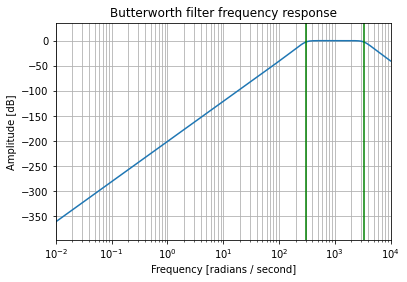

In [5]:
b, a = signal.butter(4, [300,3400], 'bandpass', analog=True)# b= num of filter and a is den
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(300, color='green') # lower cutoff frequency
plt.axvline(3400, color='green') # higher cutoff frequency
plt.show()

#### Applying the above bandpass filter to the original signal

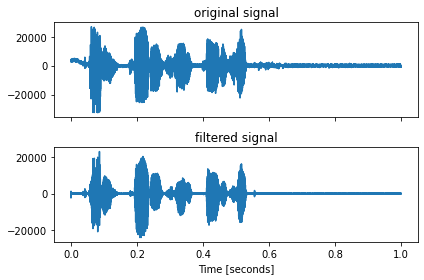

In [6]:
sig = audio[:,0]
sos = signal.butter(10, [300,3400], 'bandpass', output='sos',fs=16000)
filtered = signal.sosfilt(sos, sig)
t = np.linspace(0, 1, 90320, False)  # 1 second
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t,sig)
ax1.set_title('original signal')
# ax1.axis([0, 1, -2, 2])
ax2.plot(t,filtered)
ax2.set_title('filtered signal')
# ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [7]:
print('original signal:')
ipd.display(ipd.Audio(data=audio[:,0], rate = 16000))
print('filtered signal:')
ipd.display(ipd.Audio(data=filtered, rate = 16000))
write("direct_bandpass.wav", rate=16000, data=filtered.astype(np.int16))

original signal:


filtered signal:


### Method2: Series combination of Low Pass and High Pass Filter

**Low pass filter with cutoff 3400Hz**

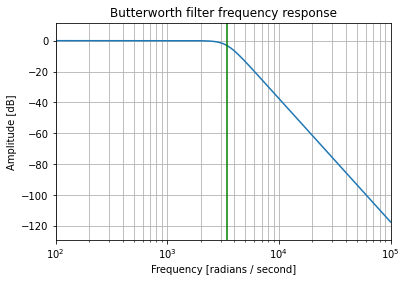

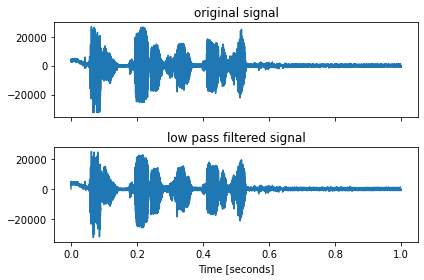

In [8]:
b, a = signal.butter(4, 3400, 'lowpass', analog=True)# b= num of filter and a is den
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3400, color='green') #cutoff frequency
plt.show()

sig = audio[:,0]
sos = signal.butter(10, 3400, 'lowpass', output='sos',fs=16000)
low_filtered = signal.sosfilt(sos, sig)
t = np.linspace(0, 1, 90320, False)  # 1 second
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t,sig)
ax1.set_title('original signal')
# ax1.axis([0, 1, -2, 2])
ax2.plot(t,low_filtered)
ax2.set_title('low pass filtered signal')
# ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

write("low_pass3400.wav", rate=16000, data=filtered.astype(np.int16))
# print('original signal:')
# ipd.display(ipd.Audio(data=audio[:,0], rate = 16000))
# print('low pass filtered signal:')
# ipd.display(ipd.Audio(data=low_filtered, rate = 16000))

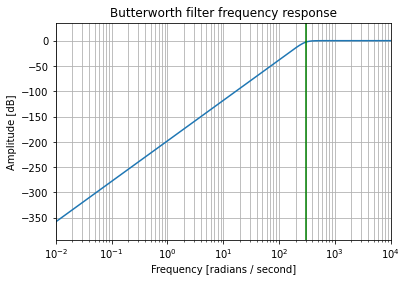

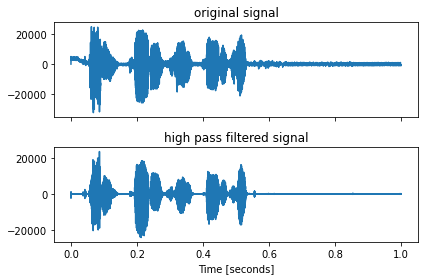

In [9]:
b, a = signal.butter(4, 300, 'highpass', analog=True)# b= num of filter and a is den
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(300, color='green') #cutoff frequency
plt.show()

sig = low_filtered
sos = signal.butter(10, 300, 'highpass', output='sos',fs=16000)
high_filtered = signal.sosfilt(sos, sig)
t = np.linspace(0, 1, 90320, False)  # 1 second
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t,sig)
ax1.set_title('original signal')
# ax1.axis([0, 1, -2, 2])
ax2.plot(t,high_filtered)
ax2.set_title('high pass filtered signal')
# ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

write("low3400_high300.wav", rate=16000, data=filtered.astype(np.int16))
# print('original signal:')
# ipd.display(ipd.Audio(data=low_filtered, rate = 16000))
# print('high pass filtered signal:')
# ipd.display(ipd.Audio(data=high_filtered, rate = 16000))